# K-Nearest Neighbors

## References 

- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html
- https://machinelearningexploration.readthedocs.io/en/latest/MathExploration/distances.html

## Dataset Setup

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

plt.style.use('seaborn')

%matplotlib inline

In [6]:
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_classes=2, class_sep=2,
                           n_clusters_per_class=1, random_state=888)

X.shape, y.shape

((100, 2), (100,))

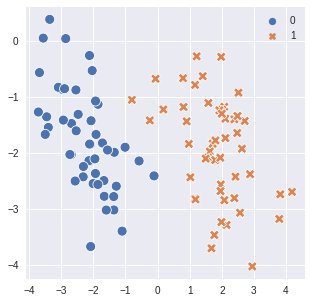

In [7]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax1, palette='deep', s=100)
plt.show()

## Assumption

- similar points have similar labels

## Algorithm

\begin{align*}
& \text{Test Point } x\\
& \text{k nearest neighbors }S_x \subseteq D \text{, such that } | S_x | = k\\
\\
& \forall (x',y') \in D \backslash S_x \implies \text{ part of dataset but not in nearest neighbors}\\
& \text{distance } (x, x') \ge {max\atop{(x'', y'') \in S_x}} dist(x, x'')
\end{align*}


- In essence points that are not in k nearest neighbors than they must be farther than the test data points compared to the maximum distance from k nearest neighbors 
- labels of k nearest neighbors idenitfies test point's labels.
- knn is as good as the distance metric it uses.

In [8]:
from scipy.spatial import minkowski_distance

In [13]:
def k_nearest_neighbors(X, test_point, k):
    
    ## using minkowski distance with p2 (basically euclidean)
    distances = minkowski_distance(X, test_point, p=2)
    
    ## getting closest(lowest distance) point's indeces
    nearest_neighbors_indexes = np.argpartition(distances, k)[:k] 
    return nearest_neighbors_indexes


def plot_neighbors(X, y, test_point, ax):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep', s=100)

    nearest_neighbors_indexes = k_nearest_neighbors(X, test_point, k = 7)

    sns.scatterplot(x=test_point[[0]], y=test_point[[1]], color='r', ax=ax, palette='deep', marker='^', 
                    s=150, label='test-point')
    sns.scatterplot(x=X[nearest_neighbors_indexes,0], y=X[nearest_neighbors_indexes,1], color='k', ax=ax, 
                    palette='deep', s=100, alpha=0.5, label='nearest neighbors')

    ax.legend(bbox_to_anchor=(1, 1.3), loc='upper right')

learn more about distances here - https://machinelearningexploration.readthedocs.io/en/latest/MathExploration/distances.html

## Training

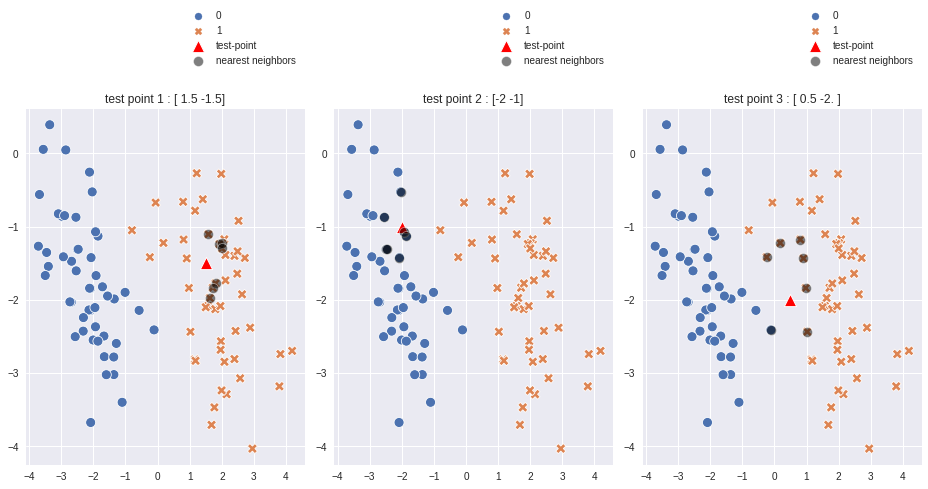

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(13, 7))

test_point1 = np.array([1.5, -1.5])
ax[0].set_title(f'test point 1 : {test_point1}')

plot_neighbors(X, y, test_point1, ax[0])



test_point2 = np.array([-2, -1])
ax[1].set_title(f'test point 2 : {test_point2}')

plot_neighbors(X, y, test_point2, ax[1])



test_point3 = np.array([0.5, -2])
ax[2].set_title(f'test point 3 : {test_point3}')
plot_neighbors(X, y, test_point3, ax[2])

plt.tight_layout()
plt.show()

### In above plot

**test point 1 = (1.5, -1.5)** resides in 1's area dominently and all 7 nearest neighbors are indicating 1 as label.

In [15]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point1, k = 7)
test_point1, y[nearest_neighbors_indexes]

(array([ 1.5, -1.5]), array([1, 1, 1, 1, 1, 1, 1]))

**test point 2 = (-2.0,-1,0)** resides in 0's area dominently and all k nearest neighbors are indicating 0 as label.

In [16]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point2, k = 7)
test_point2, y[nearest_neighbors_indexes]

(array([-2, -1]), array([0, 0, 0, 0, 0, 0, 0]))

**test point 3 = (0.5, -2)** resides in somewhat center of the plot and due to euclidean distance calculation algorithm 6 out of 7 nearest neighbors have label as 1.

In [17]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point3, k = 7)
test_point3, y[nearest_neighbors_indexes]

(array([ 0.5, -2. ]), array([1, 1, 1, 0, 1, 1, 1]))

## Prediction & Decision Boundary

In [23]:
def predict(X, y, test_point, k):
    
    nearest_neighbors_indexes = k_nearest_neighbors(X, test_point, k)
    pred_y = y[nearest_neighbors_indexes]
    
    labels, counts =  np.unique(pred_y, return_counts=True)
    total_possibilities = counts.sum()
    
    pred_probs = {}
    
    for i in zip(labels,counts):
        pred_probs[i[0]] = i[1]/ total_possibilities
    
    total_labels = np.unique(y)
    
    for label in total_labels:
        if label not in pred_probs:
            pred_probs[label] = 0
    return pred_probs

def prediction_boundary(X, y, k, ax):
    # Creating a meshgrid to generate predictions and decision boundary.
    xx, yy = np.meshgrid(np.linspace(X.min(), X.max(), 100),np.linspace(X.min() , X.max(), 100))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    
    mesh_pred = np.array([predict(X, y, i, k=k).get(1) for i in mesh])
    zz = mesh_pred.reshape(xx.shape)
    
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax, palette='deep')
    ax.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.4)
    ax.set_title(f"k = {k}")

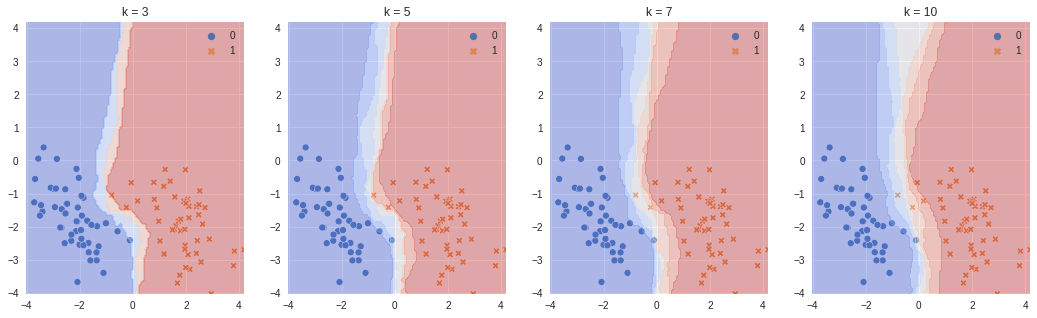

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

prediction_boundary(X, y, k=3, ax=ax[0])

prediction_boundary(X, y, k=5, ax=ax[1])

prediction_boundary(X, y, k=7, ax=ax[2])

prediction_boundary(X, y, k=10, ax=ax[3])

plt.legend()
plt.show()

With increasing number of nearest neighbors for prediction (k) the decision boundary widens more, which means more boundary cases will have less prediction probabilties closer to 1. 